# Quiz 2 (100 points total)
The deliverable of this quiz is this jupyter-notebook completed with your solution.

If not necessary, you are not allowed to change the code that are provided, you are being assessed based on:
  - 1. Code execution - 25%
  - 2. Clarity of the code (e.g., easy to follow, has pertinent comments, etc.) - 25%
  - 3. Proper usage of the techniques seen in class - 25%
  - 4. Quality and correcteness of the results - 25%

# Elaheh Beheshti  
      
## Importing Python Libraries

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Activation,Input 
from tensorflow.keras.optimizers import SGD

import sys
## Adding dataset_utils to the system path so we can import it

MY_UTILS_PATH = 'Modules/'
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import dataset_utils 


## Loading and Displaying a Synthetic 2D Dataset

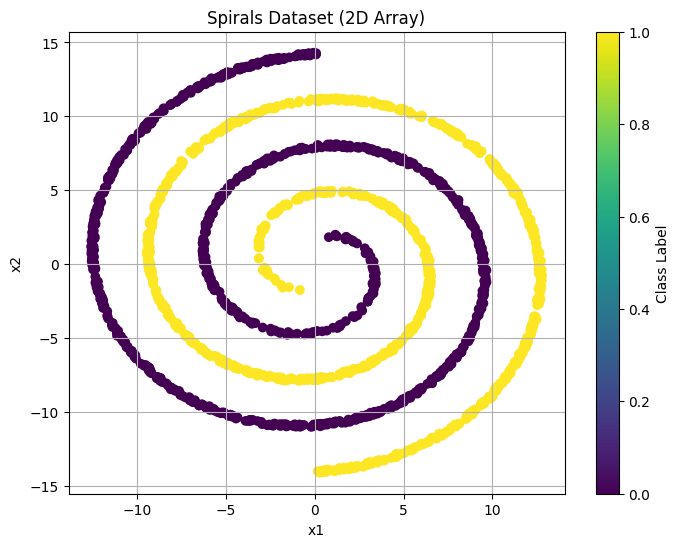

In [11]:
nsamples = 2000
data = dataset_utils.spirals(N = nsamples,degrees = 720, start = 90) 

# Include your solution below


# Separating features (X) and labels (Y)
#Y = data[:,-1].astype(int) # Labels
#X = data[:,:-1] # Features

# Separate the features (X) and labels (Y)
X = data[:, :2]  # The first two columns are the features
Y = data[:, -1].astype(int)  # The last column is the label

#Number of classes
k = np.unique(Y).size

colors = np.array(['r','y','b','g'])
#Displaying the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0],X[:,1],c=Y, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title('Spirals Dataset (2D Array)')
plt.colorbar(label='Class Label')
plt.show()



## Train, Validation and Test Sets Split

In [12]:
# Include your solution below

# First we will shuffle the samples
indexes = np.arange(X.shape[0]) # Create an array of sample indices
np.random.shuffle(indexes)      # Shuffle the indices
X = X[indexes,:]                # Shuffle the rows of X according to the indices
Y = Y[indexes]                  # Shuffle the labels in the same order

# Then, we split our data into train/val/test sets
#train_split = np.int(0.5*Y.size)
#val_split = np.int(0.75*Y.size)
train_split = int(0.5*Y.size)  # 50% for training set
val_split = int(0.75*Y.size)   # Next 25% for validation set

X_train = X[:train_split,:]  
Y_train = Y[:train_split]    

X_val = X[train_split:val_split,:] 
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

In [13]:
# Display the sizes of each set
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 1000 samples
Validation set size: 500 samples
Test set size: 500 samples


## Data Normalization

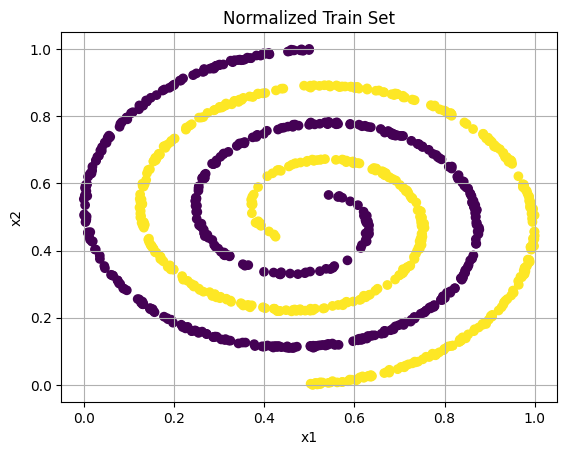

In [14]:
# Include your solution below

# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)  # Calculate minimum value for each feature
x_train_max = X_train.max(axis = 0, keepdims = True)  # Calculate maximum value for each feature

# Normalize each set using the min-max formula: (X - min) / (max - min)
X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# Change the min-max normalization above by standardization ((X - mean)/(std))
####################################################################################


#Displaying the normalized train set
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Normalized Train Set")
plt.show()

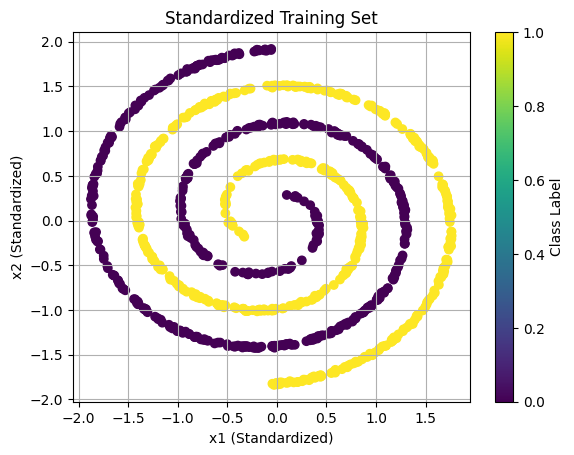

In [15]:
#####################################################################################
#Activity suggestion:
# Change the min-max normalization above by standardization ((X - mean)/(std))
####################################################################################

# Step 1: Calculate the mean and standard deviation for each feature in the training set
x_train_mean = X_train.mean(axis=0, keepdims=True)  # Mean of each feature
x_train_std = X_train.std(axis=0, keepdims=True)    # Standard deviation of each feature

# Step 2: Apply standardization to the training, validation, and test sets
# Standardization formula: (X - mean) / std
X_train = (X_train - x_train_mean) / x_train_std
X_val = (X_val - x_train_mean) / x_train_std
X_test = (X_test - x_train_mean) / x_train_std

# Step 3: Display the standardized training set
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='viridis')
plt.xlabel("x1 (Standardized)")
plt.ylabel("x2 (Standardized)")
plt.title("Standardized Training Set")
plt.grid()
plt.colorbar(label='Class Label')
plt.show()


## Representing Labels using one-hot-encoding

In [20]:
# Include your solution below

Y_oh_train = to_categorical(Y_train, k) 
Y_oh_val = to_categorical(Y_val, k) 
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])


Y_train[:5]:
[0 0 1 1 1]

Y_oh_train[:5]=
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## Defining a Fully Connected Neural Network with Keras

In [25]:
# you must create a 5 layers (1 input layer, 3 hidden layers, 1 output layer) fully connected neural network model
def my_model(k, learning_rate = 0.15):
     # Step 1: Define the input layer
    # Include your solution below
    inputs = Input(shape=(2,))  # Input layer with 2 features

     # Step 2: Define 3 hidden layers
    hidden1 = Dense(64, activation='relu')(inputs)  # First hidden layer with 64 neurons
    hidden2 = Dense(32, activation='relu')(hidden1) # Second hidden layer with 32 neurons
    hidden3 = Dense(16, activation='relu')(hidden2) # Third hidden layer with 16 neurons
    
    # Step 3: Define the output layer
    out1 = Dense(k, activation='softmax')(hidden3)  # This line connects the output layer to the third hidden layer (hidden3).
    
    # Step 4: Create the model
    model = Model(inputs=inputs, outputs=out1)

    # Step 5: Compile the model using Stochastic Gradient Descent optimizer
    sgd = SGD(learning_rate=learning_rate)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics = ["accuracy"]) 
    
    
    return model  


In [26]:

# Display the model architecture
model = my_model(k)
print(model.summary())


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,834 (11.07 KB)

 Trainable params: 2,834 (11.07 KB)

 Non-trainable params: 0 (0.00 B)

None


## Training the Model

In [27]:
# Include your solution below

# Define batch size and number of epochs
batch_size =  train_split  # we can Use a batch size of 32 samples (we can adjust this as needed)
nb_epoch = 100   # Train for 100 epochs

# Train the model using the training set and validate with the validation set
history = model.fit(X_train,               # Training features
                    Y_oh_train,            # Training labels (one-hot encoded)
                    validation_data=(X_val, Y_oh_val),  # Validation data and labels
                    batch_size=batch_size,  # Number of samples per gradient update
                    epochs=nb_epoch,        # Number of epochs to train the model
                    verbose=1)              # Display progress during training

# Display the final training and validation loss/accuracy
print(f"Final training loss: {history.history['loss'][-1]}")
print(f"Final training accuracy: {history.history['accuracy'][-1]}")
print(f"Final validation loss: {history.history['val_loss'][-1]}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]}")


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.5060 - loss: 0.6960 - val_accuracy: 0.5300 - val_loss: 0.6883
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5060 - loss: 0.6930 - val_accuracy: 0.5300 - val_loss: 0.6864
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5060 - loss: 0.6905 - val_accuracy: 0.5200 - val_loss: 0.6847
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4960 - loss: 0.6883 - val_accuracy: 0.5100 - val_loss: 0.6832
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4920 - loss: 0.6864 - val_accuracy: 0.5280 - val_loss: 0.6818
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5110 - loss: 0.6847 - val_accuracy: 0.5620 - val_loss: 0.6805
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5430 - loss: 0.6831 - val_accuracy: 0.5180 - val_loss: 0.6793
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5150 - loss: 0.6816 - val_accuracy: 0.4900 - val_loss

## Prininting Loss and estimated weights (Ws)

Final test loss (cross-entropy) and accuracy: 0.6393, 0.6440

Layer 0
Bias:
 [-0.01708393 -0.02060819  0.01204349  0.00699232  0.01401208  0.00270907
  0.00782092 -0.00386134 -0.0283385  -0.00267528 -0.01867418 -0.01939098
 -0.0007005   0.0125002   0.01326545 -0.02255483 -0.00028554  0.0199587
 -0.02204152  0.0024223   0.00238167  0.00490702  0.01060728 -0.00079292
 -0.00688588  0.01618271 -0.00820304 -0.00051601 -0.00148748  0.00709405
 -0.00485435 -0.00977202 -0.00320185 -0.01298478 -0.00989377  0.00659642
  0.01289711 -0.00574986  0.01026403 -0.0171935   0.00651602  0.0014525
 -0.00719699 -0.01470013  0.01086212 -0.00115109 -0.00273411  0.00793905
  0.00464052 -0.00890394 -0.0026382  -0.02586706  0.00084337  0.0140179
 -0.00193323 -0.01023787 -0.00175777 -0.00974411 -0.00153924  0.0134184
  0.01728642  0.02103167  0.00582253  0.0001829 ]
W:
 [[ 0.09670405 -0.08293237 -0.11918403  0.12574607  0.1081297   0.1892623
  -0.02294292  0.14263834  0.19490907 -0.1781547   0.2325935   0.30769

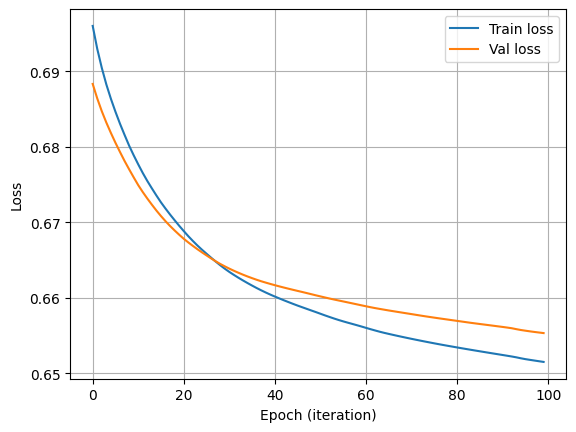

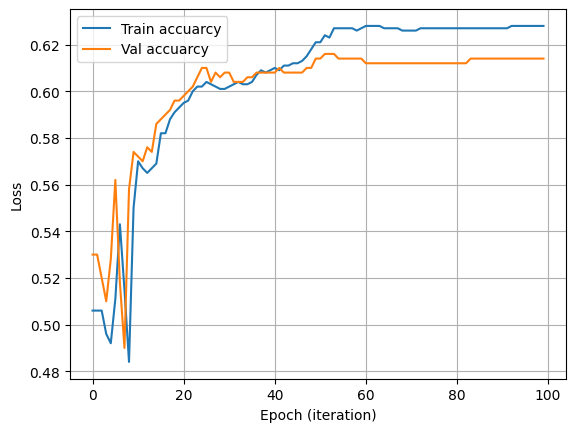

In [29]:
# Include your solution below
# Evaluate the model on the test set and print the final loss and accuracy
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print(f'Final test loss (cross-entropy) and accuracy: {loss[0]:.4f}, {loss[1]:.4f}')
print()

# Retrieve and display the model weights and biases
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()
# Plotting the loss curves for training and validation sets
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plotting the accuracy curves for training and validation sets
plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

## Testing

1188/1188 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step


/var/folders/y1/xyrxnh312j387t4r0dqc9v6c0000gn/T/ipykernel_15461/3273384060.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[:, 0], X_train[:, 1], c=colors[Y_train], edgecolors='k', cmap=plt.cm.Paired, label='Training Data')


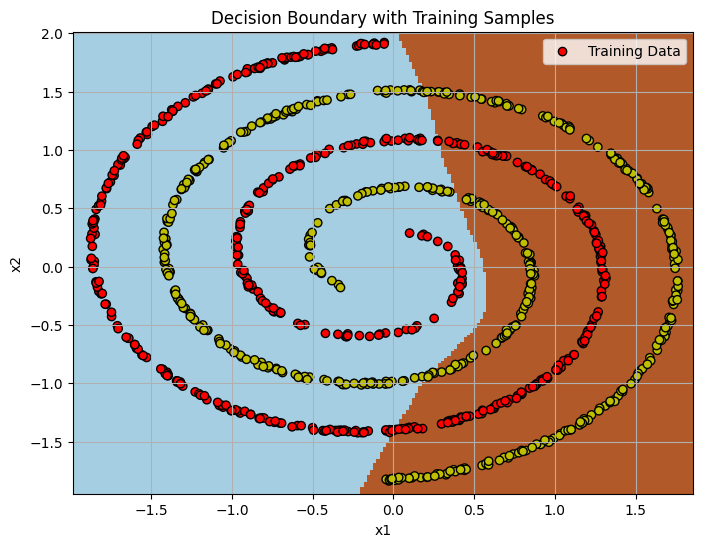

In [31]:
# predict the first 10 data from the testing dataset, and show the true labels of the first 10 data

# Include your solution below

h = 0.02  # Step size in the mesh
slack = 0.1

# Calculate the grid for the attribute space (x1 and x2 ranges)
x_min, x_max = X_train.min(axis=0) - slack, X_train.max(axis=0) + slack
xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h), np.arange(x_min[1], x_max[1], h))
X_grid = np.c_[xx.ravel(), yy.ravel()]  # Flatten the mesh grid for model prediction

# Predict the class for each point in the mesh grid
Z = model.predict(X_grid).argmax(axis=1)
Z = Z.reshape(xx.shape)  # Reshape to match the mesh grid

# Display decision boundary
plt.figure(figsize=(8, 6))  # Set a larger figure size for better visibility
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Display the training samples
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors[Y_train], edgecolors='k', cmap=plt.cm.Paired, label='Training Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Decision Boundary with Training Samples")
plt.legend(loc='upper right')
plt.grid()
plt.show()


